## Projeto 2 - Ciência dos Dados

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

# Bibliotecas necessárias para o modelo 1 (Árvore de decisão)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from six import StringIO

#Bibliotecas necessárias para o modelo 2 (Regressão logística), que não foram utilizadas anteriormente.
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
# Lendo o banco de dados
data_0 = pd.read_csv("data.csv")

In [3]:
# Rodando as primeiras 5 linhas do banco de dados
data_0.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
# Filtrando as colunas
data = data_0.loc[:,["tempo", "target","speechiness", "loudness", "energy", "instrumentalness", "duration_ms", "danceability", "acousticness"]]

In [5]:
# Rodando as primeiras linhas depois de filtrar
data.head()

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
0,150.062,1,0.4310,-8.795,0.434,0.021900,204600,0.833,0.0102
1,160.083,1,0.0794,-10.401,0.359,0.006110,326933,0.743,0.1990
2,75.044,1,0.2890,-7.148,0.412,0.000234,185707,0.838,0.0344
3,86.468,1,0.0261,-15.236,0.338,0.510000,199413,0.494,0.6040
4,174.004,1,0.0694,-11.648,0.561,0.512000,392893,0.678,0.1800


In [6]:
data_hit = data.loc[data['target']==1]
data_hit

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
0,150.062,1,0.4310,-8.795,0.434,0.021900,204600,0.833,0.0102
1,160.083,1,0.0794,-10.401,0.359,0.006110,326933,0.743,0.1990
2,75.044,1,0.2890,-7.148,0.412,0.000234,185707,0.838,0.0344
3,86.468,1,0.0261,-15.236,0.338,0.510000,199413,0.494,0.6040
4,174.004,1,0.0694,-11.648,0.561,0.512000,392893,0.678,0.1800
...,...,...,...,...,...,...,...,...,...
1015,139.997,1,0.2950,-1.894,0.937,0.000000,181114,0.812,0.2580
1016,86.733,1,0.2520,-6.354,0.822,0.000004,143214,0.745,0.0103
1017,140.008,1,0.2170,-5.311,0.922,0.000000,213251,0.673,0.3290
1018,147.072,1,0.2710,-6.433,0.801,0.000000,187400,0.794,0.3500


In [7]:
data_flop = data.loc[data['target']==0]
data_flop

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
1020,143.919,0,0.0267,-11.478,0.196,0.000036,227222,0.640,0.819000
1021,92.003,0,0.0431,-5.703,0.628,0.000002,180252,0.587,0.067700
1022,88.541,0,0.0432,-5.713,0.716,0.000000,187813,0.631,0.013000
1023,88.965,0,0.0376,-5.292,0.809,0.000000,194413,0.589,0.231000
1024,104.986,0,0.0353,-3.795,0.841,0.000000,227373,0.612,0.000907
...,...,...,...,...,...,...,...,...,...
2012,74.976,0,0.3330,-3.501,0.932,0.002690,274404,0.584,0.001060
2013,110.041,0,0.1310,-2.663,0.892,0.001670,182182,0.894,0.087700
2014,150.082,0,0.1070,-2.467,0.935,0.003990,207200,0.637,0.008570
2015,150.011,0,0.1330,-2.735,0.992,0.677000,185600,0.557,0.001640


# Análise exploratória inicial

### Correlação entre as categorias das músicas

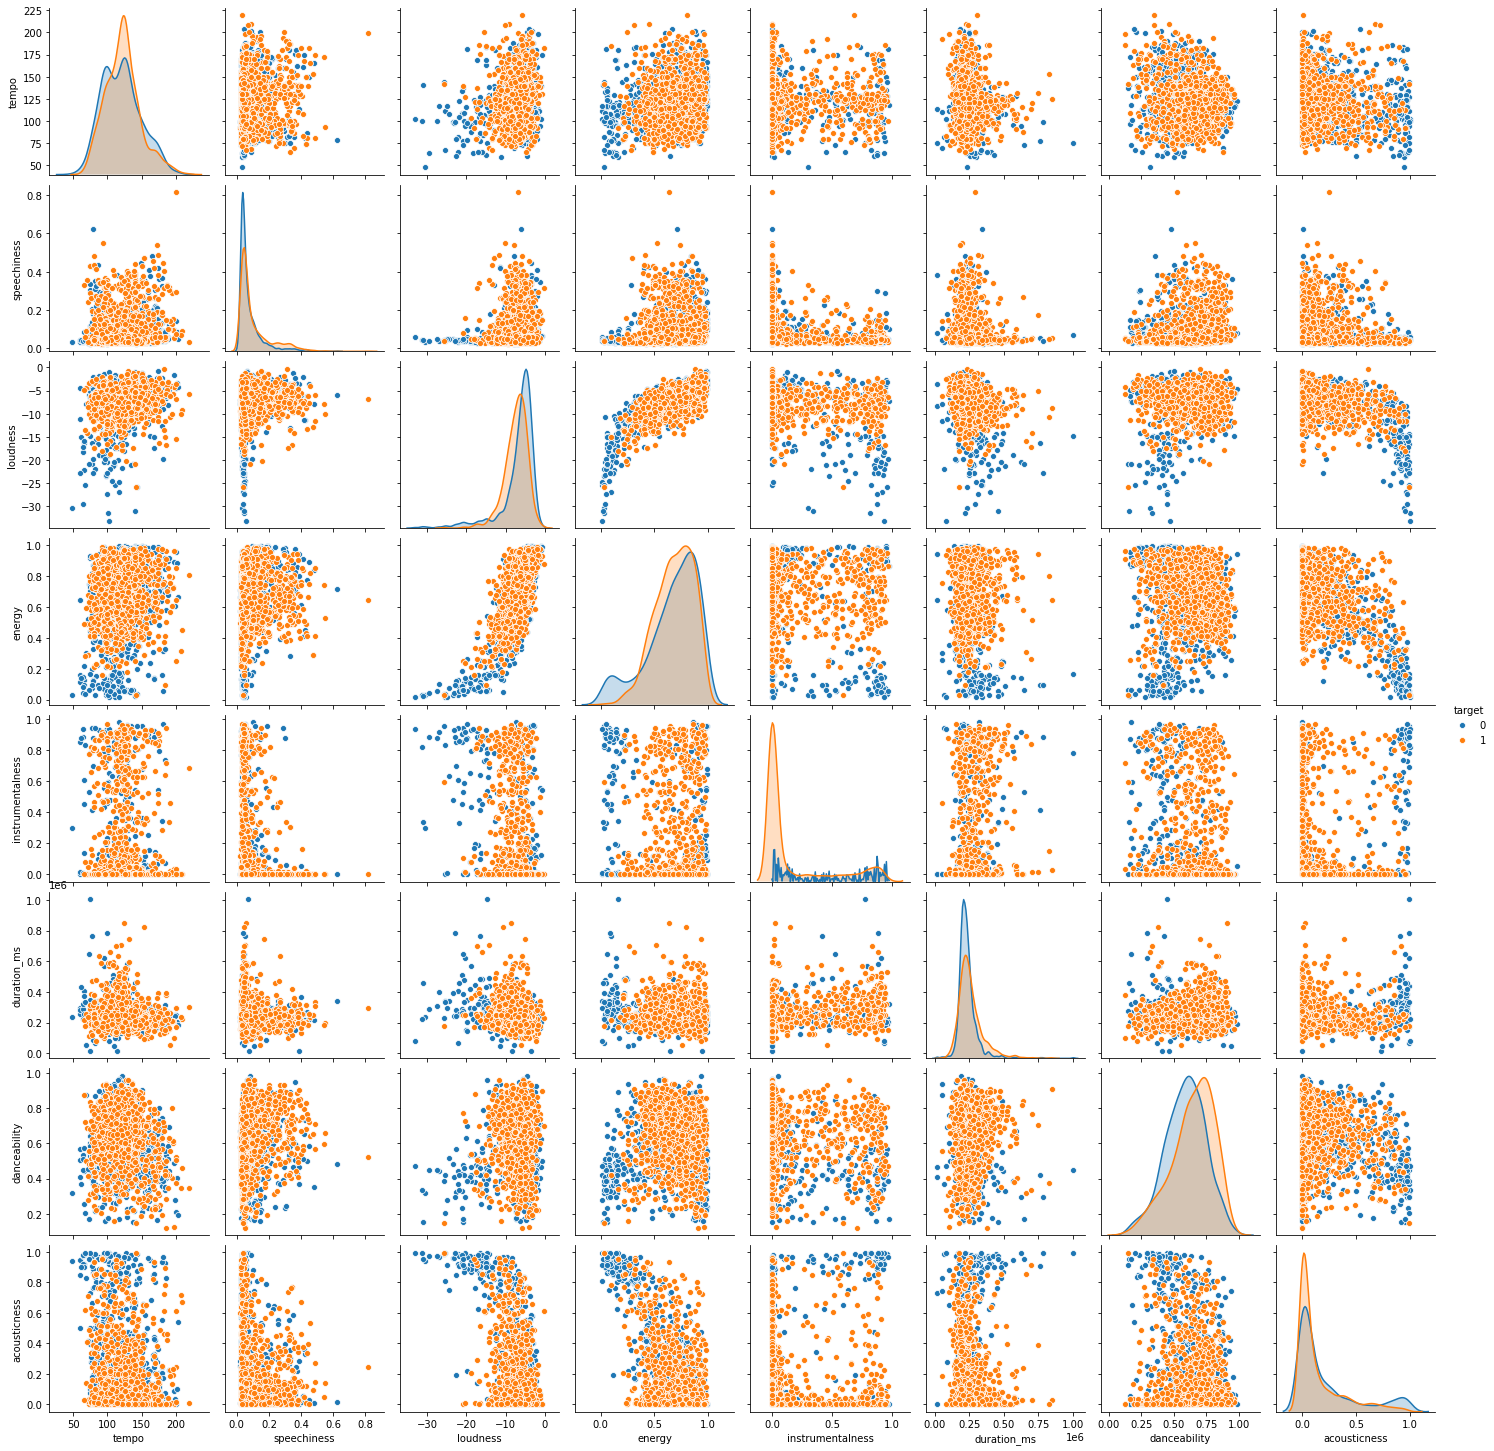

In [8]:
sns.pairplot(data, hue="target")

# Modelo 1 - Árvore de decisão

In [9]:
features = ['tempo','speechiness', 'loudness', 'energy', 'instrumentalness','duration_ms','danceability','acousticness']
X = data[features] 
Y = data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [10]:
X_train

,tempo,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
1921,90.020,0.0486,-7.775,0.553,0.000008,239933,0.675,0.08630
1400,129.750,0.0369,-10.562,0.126,0.000102,257187,0.679,0.85800
1009,139.725,0.3010,-5.841,0.780,0.000000,179009,0.494,0.35200
1479,106.002,0.1300,-5.341,0.638,0.009790,201387,0.615,0.00461
828,165.844,0.0514,-6.503,0.837,0.019700,271822,0.474,0.12700
...,...,...,...,...,...,...,...,...
1791,129.623,0.0392,-8.335,0.271,0.000000,246896,0.470,0.96200
1096,175.907,0.0508,-9.210,0.482,0.000194,193118,0.735,0.20500
1932,161.109,0.4100,-2.027,0.911,0.000000,254027,0.514,0.05590
235,102.960,0.0386,-3.886,0.578,0.006720,280427,0.757,0.01100


In [11]:
X_test

,tempo,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
351,145.306,0.0478,-5.437,0.858,0.000000,231765,0.612,0.012400
1471,97.900,0.0540,-3.794,0.737,0.000017,174031,0.546,0.050900
1658,124.994,0.0335,-5.449,0.923,0.000228,157452,0.624,0.026800
703,126.976,0.0461,-4.981,0.888,0.055100,299383,0.626,0.001520
1418,117.264,0.1850,-3.755,0.783,0.000000,291280,0.523,0.214000
...,...,...,...,...,...,...,...,...
874,137.895,0.0389,-11.815,0.404,0.759000,290587,0.438,0.577000
298,119.720,0.0322,-1.866,0.900,0.000102,200213,0.753,0.260000
1988,162.435,0.0349,-6.174,0.794,0.002040,209187,0.467,0.000084
1177,113.962,0.0862,-6.792,0.423,0.000000,176347,0.704,0.416000


In [12]:
Y_train

1921    0
1400    0
1009    1
1479    0
828     1
       ..
1791    0
1096    0
1932    0
235     1
1061    0
Name: target, Length: 1411, dtype: int64

In [13]:
Y_test

351     1
1471    0
1658    0
703     1
1418    0
       ..
874     1
298     1
1988    0
1177    0
602     1
Name: target, Length: 606, dtype: int64

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7112211221122112


In [15]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7161716171617162


In [16]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=5)

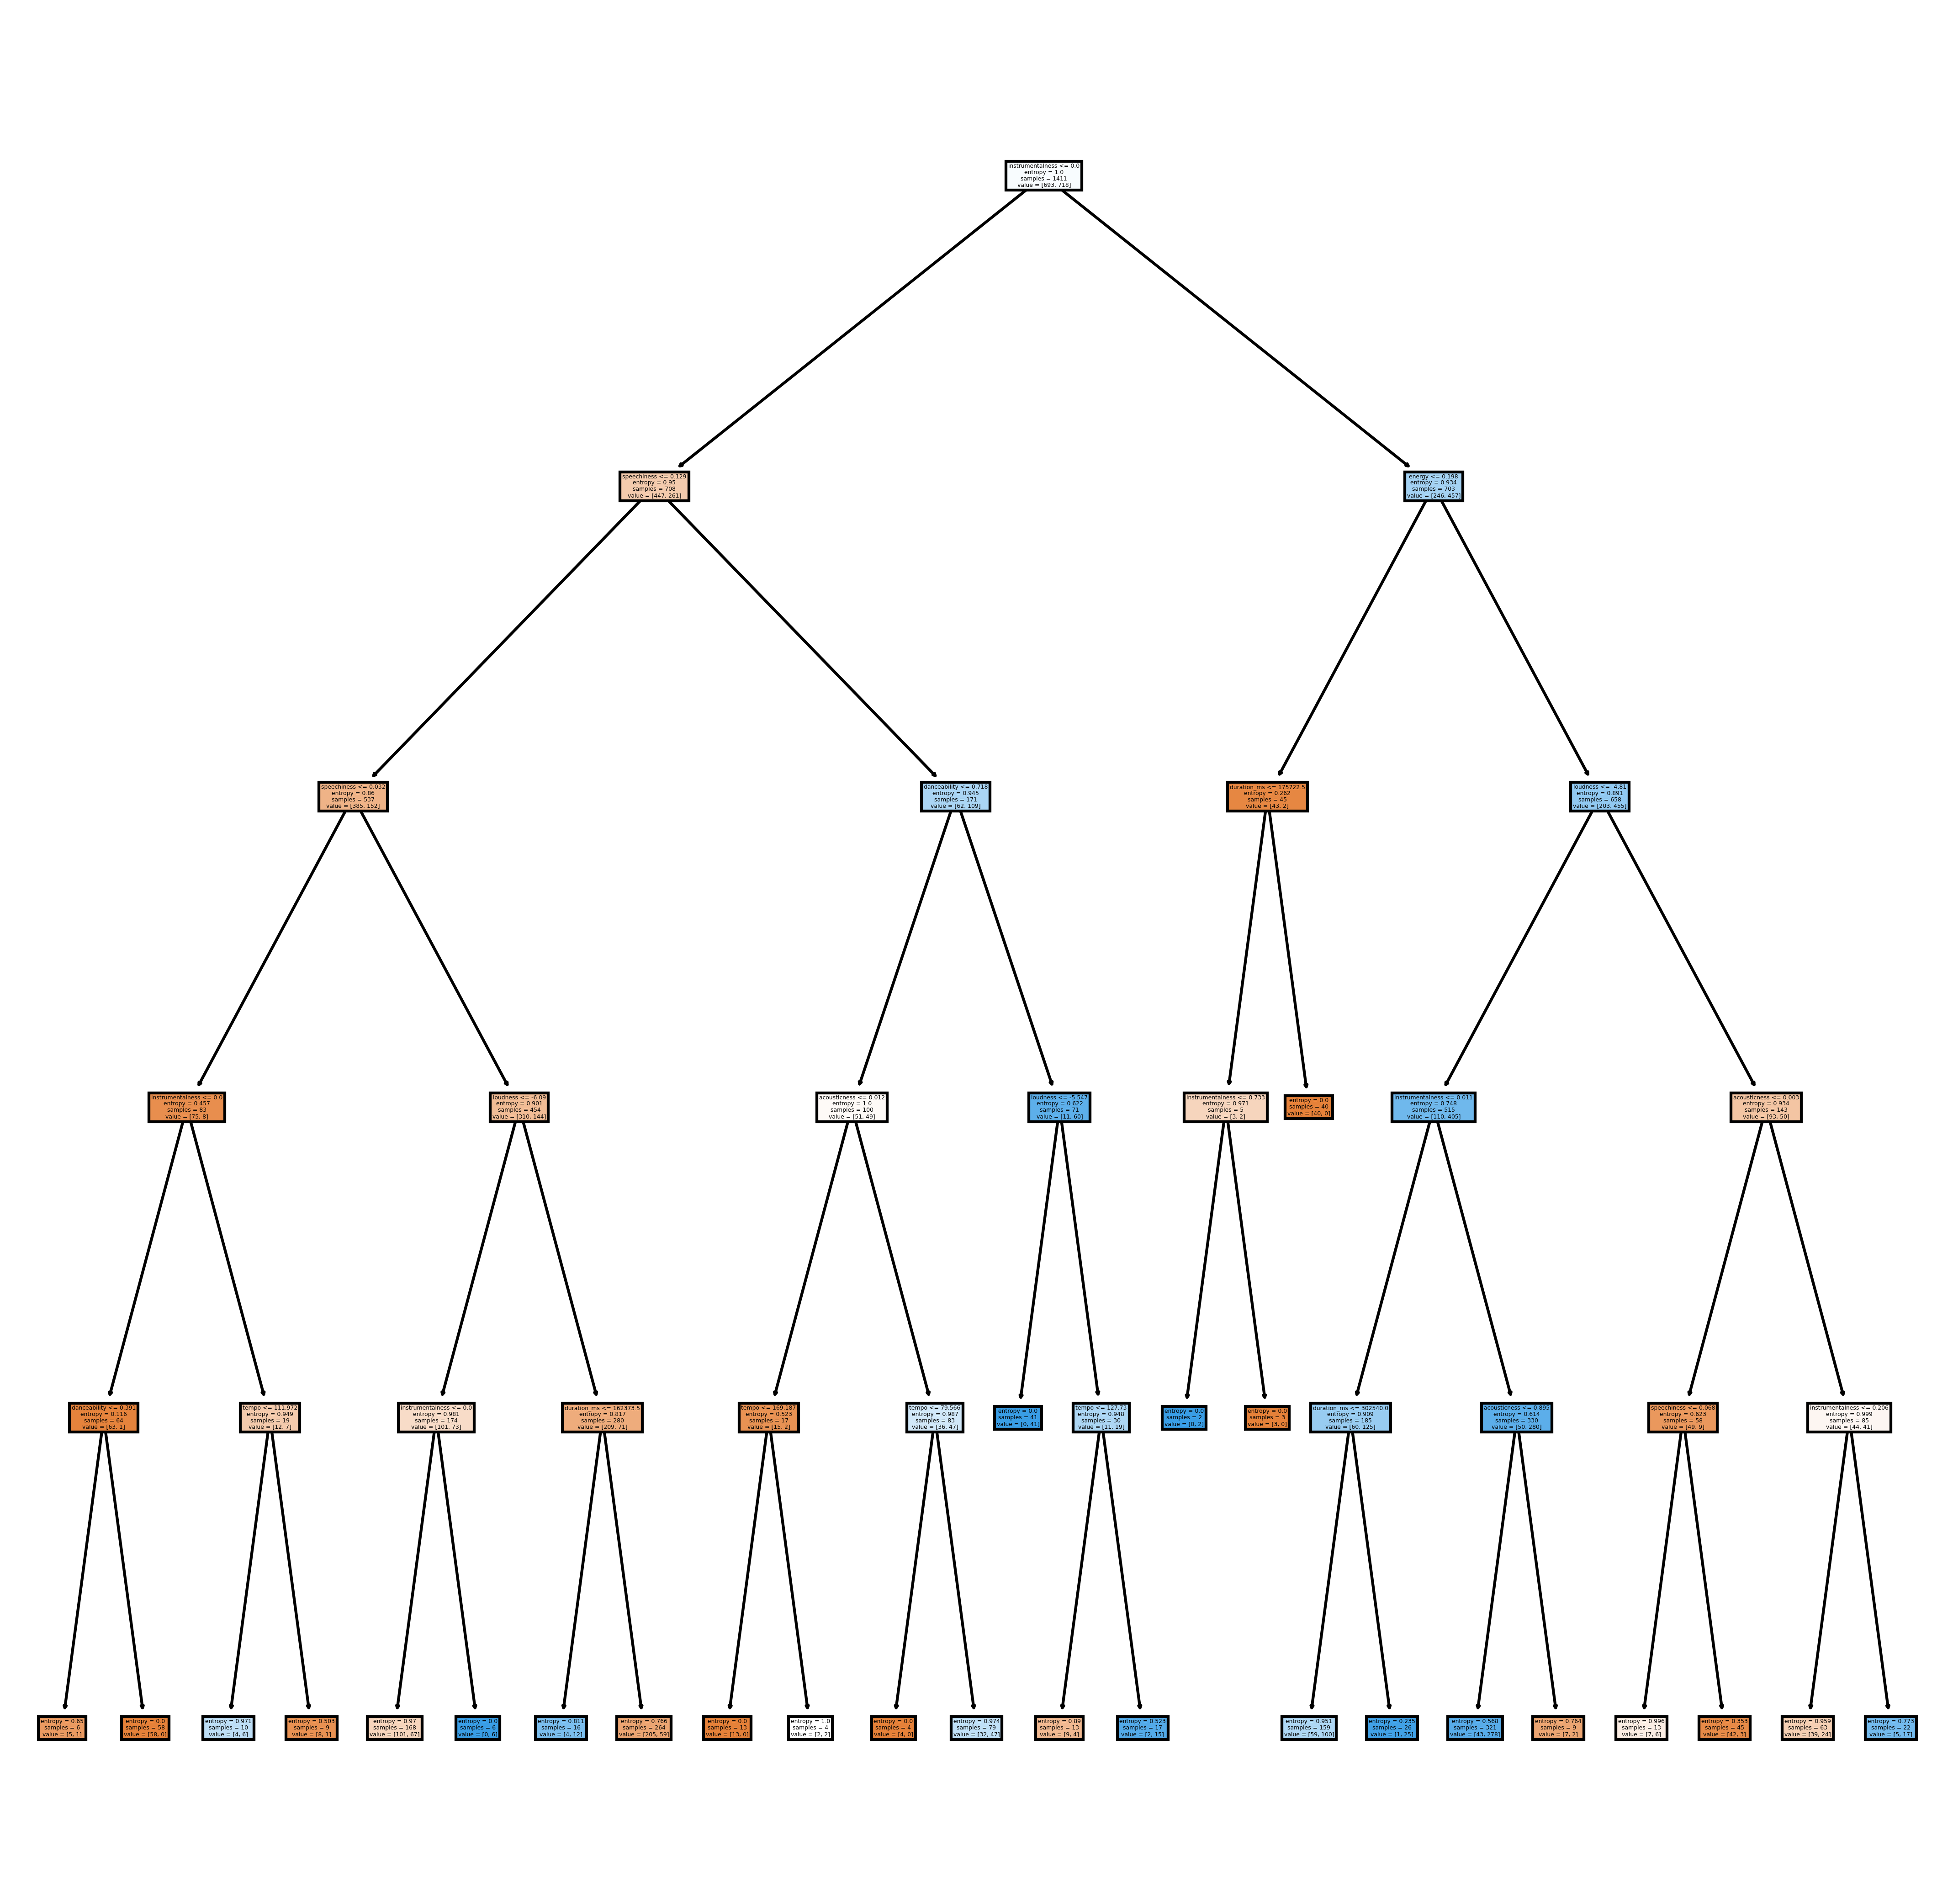

In [18]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=450)
tree.plot_tree(clf,
               feature_names = features, 
               filled = True);
fig.savefig('arvore.png')

# Modelo 2 - Regressão Logística

In [19]:
regressao= LogisticRegression()
regressao.fit(X_train,Y_train)
y_pred_2=regressao.predict(X_test)

Accuracy:  0.49834983498349833


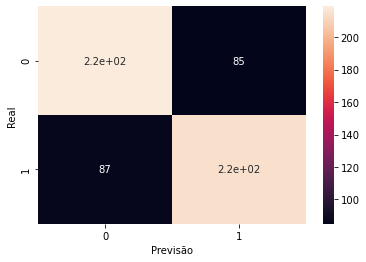

In [20]:
matriz = pd.crosstab(Y_test, y_pred, rownames=['Real'], colnames=['Previsão'])
sns.heatmap(matriz, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y_test, y_pred_2))
plt.show()

In [21]:
matriz

Previsão,0,1
Real,,
0,219,85
1,87,215


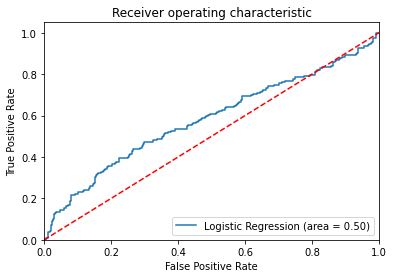

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, regressao.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, regressao.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()